<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_7_Predict_Fasshion_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import os

In [107]:
fashion_df_train = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/fashion-mnist_train.csv")
fashion_df_test = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/fashion-mnist_test.csv")

In [108]:
fashion_df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [109]:
fashion_df_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
fashion_df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [111]:
# 0     : T-shirts/top
# 1     : Trouser
# 2     : pullover
# 3     : Dress
# 4     : Coat
# 5     : Sandal
# 6     : Shirt
# 7     : Sneakers
# 8     : Bag
# 9     : Ankie boot

In [112]:
training = np.array(fashion_df_train, dtype=np.float32)
testing = np.array(fashion_df_test, dtype=np.float32)

In [113]:
training.shape

(60000, 785)

In [114]:
testing.shape

(10000, 785)

In [115]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [116]:
np.array(training[400, 1:].reshape(28,28))

array([[  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,  12.,  98.,
        129.,  24.,   8.,  25., 119., 155.,  33.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  32., 147., 201., 168.,
        207., 217., 255., 219., 218., 175., 189., 191., 120.,  17.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  91., 146., 160., 166., 160., 160.,
        153., 169., 184., 180., 155., 155., 162., 163., 170., 167., 121.,
         66.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 100., 175., 154., 154., 152., 154., 153.,
        159., 150., 148., 147., 155., 157., 155., 149., 154., 154., 161.,
        177.,  97.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 177., 149., 148., 149., 149., 150., 147.,
        138., 135., 140., 139., 136., 145., 153., 156., 150., 149., 153.,
        153., 194.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  15., 193

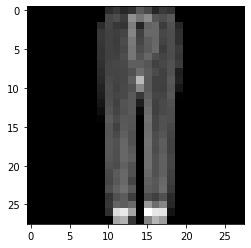

In [117]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28), cmap="gray")

In [118]:
label = training[i,0]
label

1.0

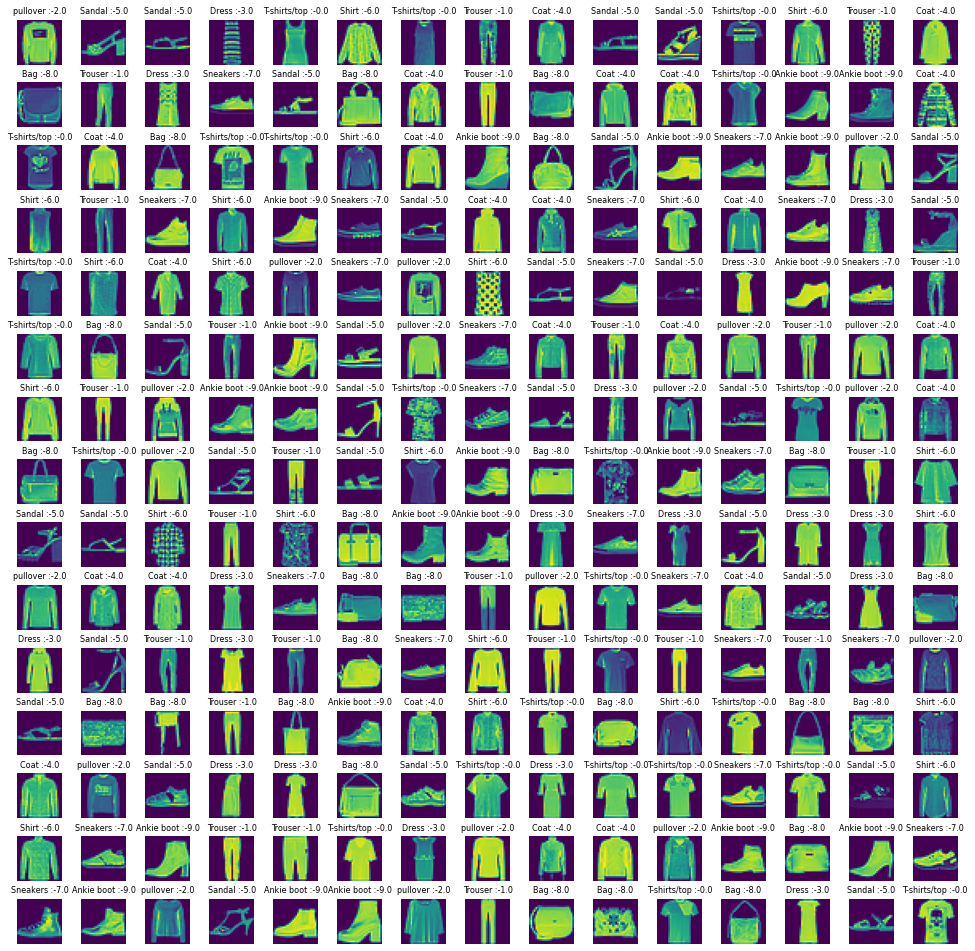

In [119]:
name_list = ["T-shirts/top", "Trouser", "pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankie boot"]

# image in grid format 
# diamensiond of grid
w_grid = 15
l_grid = 15
# axes to use object plot in specific figure various locations
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17)) 
# flatten the 15*15 matrix in 255 array
axes = axes.ravel()
n_training = len(training)
# selecting random number from training set
for i in np.arange(0, w_grid*l_grid):
    index = random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    # creating plot title based index name id
    name  = str(name_list[int(training[index, 0])])+" :-" + str(training[index, 0])
    axes[i].set_title(name, fontsize=8)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

In [120]:
x_train = training[:, 1:]/255 # expect first its target label
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [121]:
y_train = training[:,0]
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [122]:
x_test = testing[:, 1:]/255 # expect first its target label /255 will normalize data 
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [123]:
y_test = testing[:,0]
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [124]:
x_train.shape

(60000, 784)

In [125]:
y_train.shape

(60000,)

In [126]:
x_train = x_train.reshape(x_train.shape[0], * (28,28, 1))
x_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [127]:
x_test = x_test.reshape(x_test.shape[0], * (28,28, 1))
x_test

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [128]:
x_train.shape

(60000, 28, 28, 1)

In [129]:
x_test.shape

(10000, 28, 28, 1)

In [130]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation="relu" ))
cnn.add(layers.MaxPooling2D(2,2)) 


cnn.add(layers.Conv2D(64, (3,3), activation="relu"))

cnn.add(layers.Flatten())

In [131]:
cnn.add(layers.Dense(64, activation="relu"))
# we have 10 category so out put must have 10 class
cnn.add(layers.Dense(10, activation="softmax"))

In [132]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [133]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [134]:
epochs_hist = cnn.fit(x_train, y_train, batch_size=512, epochs=150)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.9009 - accuracy: 0.6776
Epoch 2/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5177 - accuracy: 0.8077
Epoch 3/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4341 - accuracy: 0.8436
Epoch 4/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3893 - accuracy: 0.8598
Epoch 5/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3587 - accuracy: 0.8718
Epoch 6/150
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3385 - accuracy: 0.8795
Epoch 7/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3159 - accuracy: 0.8864
Epoch 8/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3042 - accuracy: 0.8904
Epoch 9/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2964 - accuracy: 0.8937
Epoch

In [135]:
evaluation = cnn.evaluate(x_test, y_test)

In [136]:
predict_classes = cnn.predict_classes(x_test)

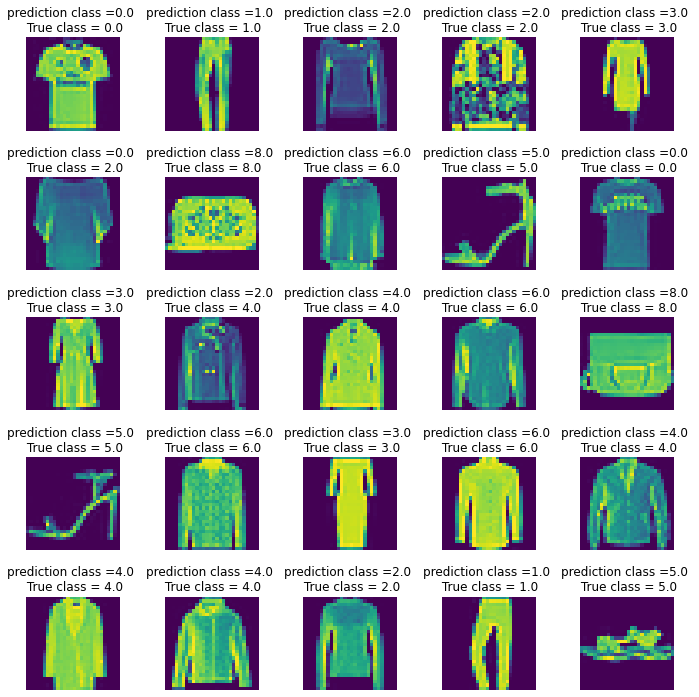

In [137]:
l = 5
w = 5
fig, axes = plt.subplots(l, w, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("prediction class ={:0.1f} \n True class = {:0.1f}". format(predict_classes[i], y_test[i]))
    axes[i].axis("off")


plt.subplots_adjust(hspace=0.5)

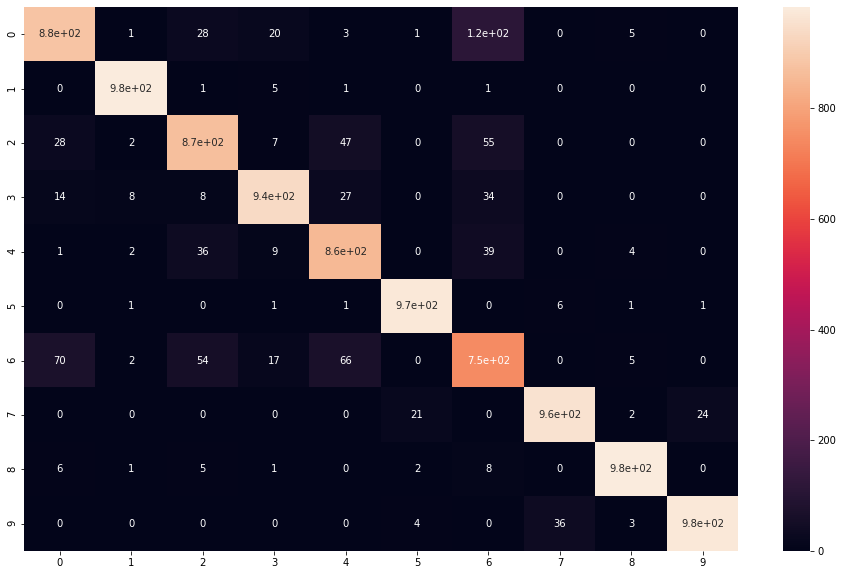

In [138]:
plt.figure(figsize=(16,10))
confusion_matrixs = confusion_matrix(predict_classes, y_test)
sns.heatmap(confusion_matrixs, annot=True)

In [139]:
number_of_class = 10
target =['class {}'.format(i) for i in range(number_of_class)]
print(classification_report(y_test, predict_classes, target_names=target))

              precision    recall  f1-score   support

     class 0       0.84      0.88      0.86      1000
     class 1       0.99      0.98      0.99      1000
     class 2       0.86      0.87      0.86      1000
     class 3       0.91      0.94      0.93      1000
     class 4       0.90      0.85      0.88      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.78      0.75      0.76      1000
     class 7       0.95      0.96      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



#**Deploy Models Using TensorFlow Serving**









##Saving Model

In [140]:
# version = 1
# export_path = os.path.join("/content/drive/My Drive/Tensorflow_2.0/SavedModel", str(version))
# print("export path is '{}'".format(export_path))

export path is '/content/drive/My Drive/Tensorflow_2.0/SavedModel/1'


In [152]:
version = 1
export_path = os.path.join("/tmp", str(version))
print("export path is '{}'".format(export_path))

export path is '/tmp/1'


In [147]:
if os.path.isdir(export_path):
    print("Already Saved model. Cleaning up")
    !rm -r {export_path}

Already Saved model. Cleaning up


In [153]:
# from tensorflow.python.saved_model.signature_def_utils import predict_signature_def
# signature = predict_signature_def(
#     inputs={"inputs": cnn.input}, outputs={t.name:t for t in cnn.outputs})

tf.saved_model.save(
    cnn,
    export_dir=export_path)

INFO:tensorflow:Assets written to: /tmp/1/assets


In [149]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  54500      0 --:--:-- --:--:-- --:--:-- 54500
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http:/

In [150]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 3s (73.0 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [151]:
import json
import requests
import tempfile

In [154]:
MODEL_DIR = tempfile.gettempdir()
os.environ["MODEL_DIR"] = MODEL_DIR

In [155]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [156]:
!tail server.log

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-10-01 06:34:01.930542: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:199] Restoring SavedModel bundle.
2020-10-01 06:34:01.970138: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /tmp/1
2020-10-01 06:34:01.975593: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 64075 microseconds.
2020-10-01 06:34:01.976468: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-10-01 06:34:01.976593: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2020-10-01 06:34:01.977657: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[wa

In [157]:
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28))
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

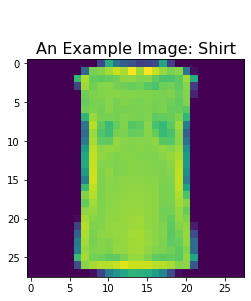

In [158]:
rando = random.randint(0,len(x_test)-1)
show(rando, 'An Example Image: {}'.format(name_list[int(y_test[rando])]))

In [160]:
# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": x_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 468], [0.12156862765550613], [0.0], [0.0], [0.0]]]]}


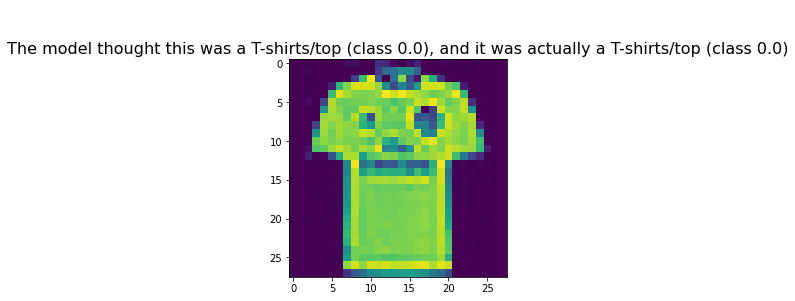

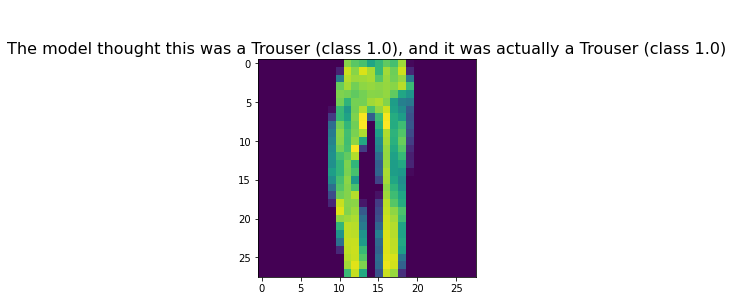

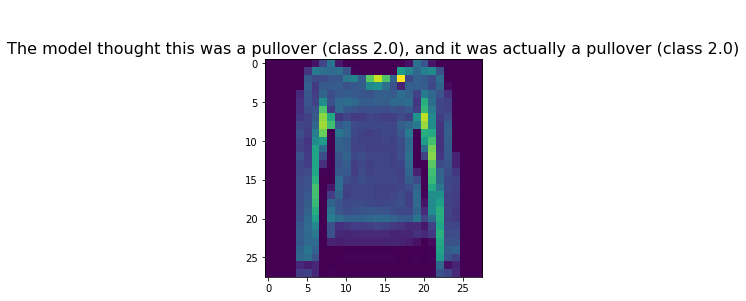

In [163]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    name_list[np.argmax(predictions[i])], y_test[i], name_list[np.argmax(predictions[i])], y_test[i]))